In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')

# DATASET

wine.csv <br>
Source: https://online.stat.psu.edu/stat508/lesson/analysis-wine-quality-data

winequalityN.csv <br>
Source: https://www.kaggle.com/swetash/beginners-friendly-comparison-of-classifiers/data

In [2]:
df1 = pd.read_csv('files/wine_data.csv')
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df2 = pd.read_csv('files/winequalityN.csv')
df2

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df2 = df2.drop(['type'], axis=1)
df = pd.concat([df1,df2])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
conditions = [
    (df['quality'] <= 5),
    (df['quality'] >= 6)
    ]

values = ['No', 'Yes']

df['buy'] = np.select(conditions, values)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,buy
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,No
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,No
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,No
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Yes
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,No
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,Yes
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Yes
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,No


In [6]:
df['buy'].value_counts()

Yes    4968
No     3128
Name: buy, dtype: int64

In [7]:
df['buyEncode'] = np.where(df['buy'] == 'No', 0, 1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,buy,buyEncode
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,No,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,No,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,No,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Yes,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,No,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,Yes,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Yes,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,No,0


# DATA EXPLORATION

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8096 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         8086 non-null   float64
 1   volatile acidity      8088 non-null   float64
 2   citric acid           8093 non-null   float64
 3   residual sugar        8094 non-null   float64
 4   chlorides             8094 non-null   float64
 5   free sulfur dioxide   8096 non-null   float64
 6   total sulfur dioxide  8096 non-null   float64
 7   density               8096 non-null   float64
 8   pH                    8087 non-null   float64
 9   sulphates             8092 non-null   float64
 10  alcohol               8096 non-null   float64
 11  quality               8096 non-null   int64  
 12  buy                   8096 non-null   object 
 13  buyEncode             8096 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 948.8+ KB


In [9]:
df.shape

(8096, 14)

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,buyEncode
count,8086.000000,8088.000000,8093.000000,8094.000000,8094.000000,8096.000000,8096.000000,8096.000000,8087.000000,8092.000000,8096.000000,8096.000000,8096.000000
mean,7.434708,0.376884,0.309288,4.870330,0.062250,27.631793,102.062068,0.995102,3.236728,0.556298,10.478209,5.782362,0.613636
std,1.463285,0.183573,0.157440,4.460673,0.039736,17.562274,59.481471,0.002930,0.163721,0.161242,1.168973,0.863688,0.486946
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.500000,0.240000,0.230000,1.800000,0.040000,14.000000,47.000000,0.992900,3.120000,0.450000,9.500000,5.000000,0.000000
50%,7.100000,0.320000,0.300000,2.500000,0.052000,25.000000,104.000000,0.995460,3.230000,0.530000,10.300000,6.000000,1.000000
75%,8.000000,0.490000,0.400000,7.000000,0.077000,38.000000,146.000000,0.997200,3.340000,0.630000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [11]:
df.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,buy,buyEncode
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,No,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,No,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,No,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Yes,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6321,6.4,0.530,0.09,3.9,0.123,14.0,31.0,0.99680,3.50,NaN,11.0,4,No,0
6428,NaN,0.440,0.09,2.2,0.063,9.0,18.0,0.99444,NaN,0.69,11.3,6,Yes,1
6429,NaN,0.705,0.10,2.8,0.081,13.0,28.0,0.99631,NaN,0.66,10.2,5,No,0
6486,7.2,NaN,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6,Yes,1


# PRE PROCESSING 

## Removing Duplicates

In [12]:
print('Duplicated Rows:', len(df) - len(df.drop_duplicates()))
df = df.drop_duplicates(keep = 'first')
df.shape

Duplicated Rows: 2763


(5333, 14)

## Dealing with NANs

In [13]:
df.isna().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
buy                      0
buyEncode                0
dtype: int64

Text(0.5, 0, 'alcohol')

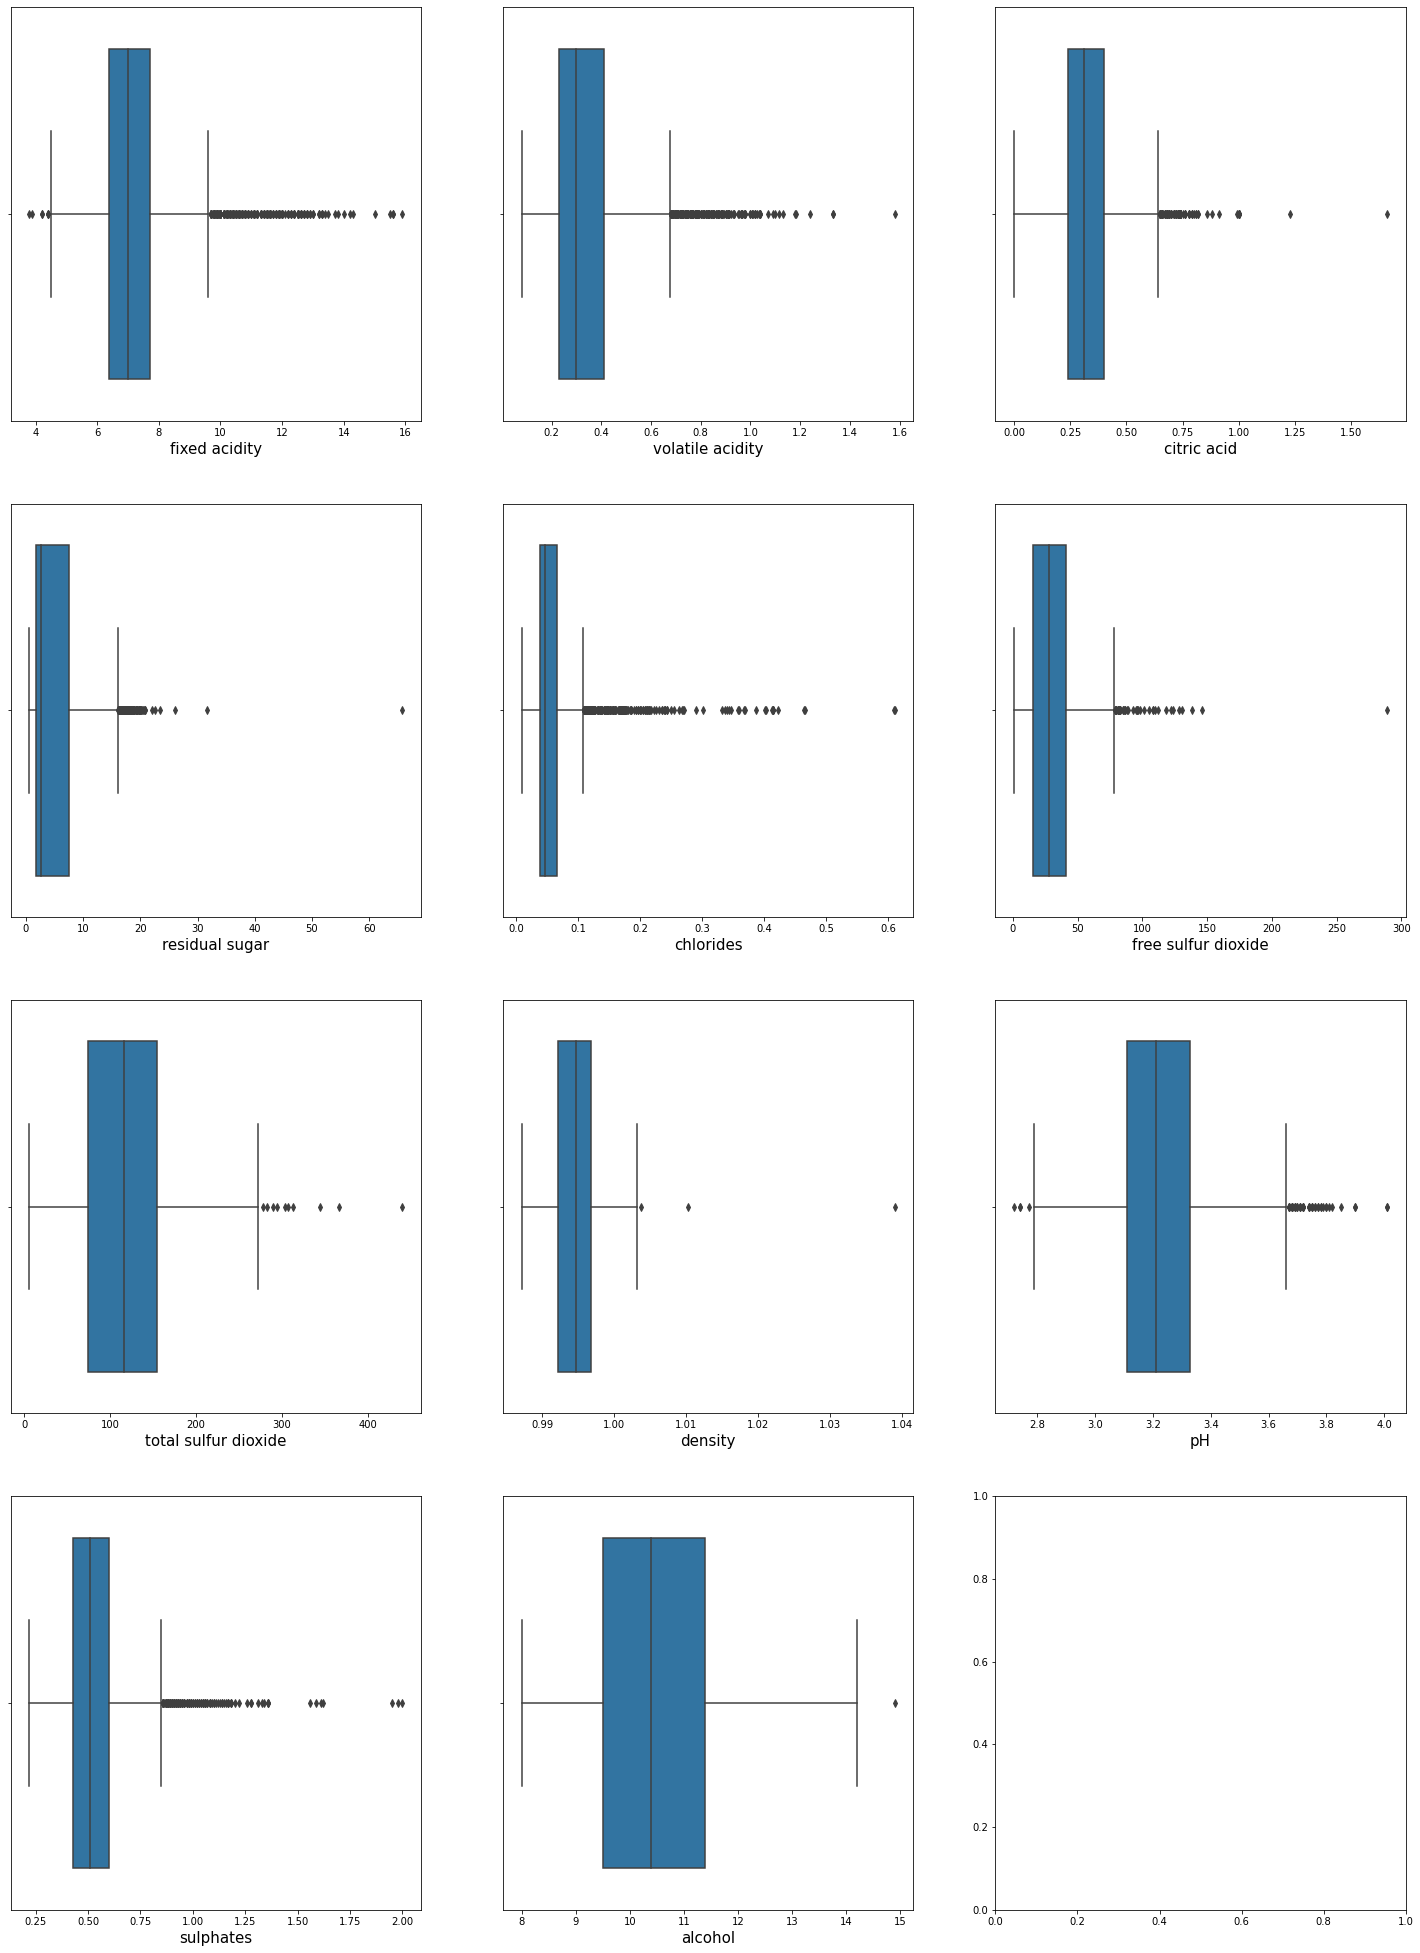

In [14]:
fig, ax = plt.subplots(4,3, figsize = (25,35)) 

sns.boxplot(x=df['fixed acidity'], ax=ax[0,0])
ax[0,0].set_xlabel('fixed acidity', fontsize=15)

sns.boxplot(x=df['volatile acidity'], ax=ax[0,1])
ax[0,1].set_xlabel('volatile acidity', fontsize=15)

sns.boxplot(x=df['citric acid'], ax=ax[0,2])
ax[0,2].set_xlabel('citric acid', fontsize=15)

sns.boxplot(x=df['residual sugar'], ax=ax[1,0])
ax[1,0].set_xlabel('residual sugar', fontsize=15)

sns.boxplot(x=df['chlorides'], ax=ax[1,1])
ax[1,1].set_xlabel('chlorides', fontsize=15)

sns.boxplot(x=df['free sulfur dioxide'], ax=ax[1,2])
ax[1,2].set_xlabel('free sulfur dioxide', fontsize=15)

sns.boxplot(x=df['total sulfur dioxide'], ax=ax[2,0])
ax[2,0].set_xlabel('total sulfur dioxide', fontsize=15)

sns.boxplot(x=df['density'], ax=ax[2,1])
ax[2,1].set_xlabel('density', fontsize=15)

sns.boxplot(x=df['pH'], ax=ax[2,2])
ax[2,2].set_xlabel('pH', fontsize=15)

sns.boxplot(x=df['sulphates'], ax=ax[3,0])
ax[3,0].set_xlabel('sulphates', fontsize=15)

sns.boxplot(x=df['alcohol'], ax=ax[3,1])
ax[3,1].set_xlabel('alcohol', fontsize=15)

## Inserting median as there are outliers

In [15]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['fixed acidity']] = imputer.fit_transform(df[['fixed acidity']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['volatile acidity']] = imputer.fit_transform(df[['volatile acidity']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['citric acid']] = imputer.fit_transform(df[['citric acid']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['citric acid']] = imputer.fit_transform(df[['citric acid']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['residual sugar']] = imputer.fit_transform(df[['residual sugar']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['chlorides']] = imputer.fit_transform(df[['chlorides']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['pH']] = imputer.fit_transform(df[['pH']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['sulphates']] = imputer.fit_transform(df[['sulphates']])

In [16]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
buy                     0
buyEncode               0
dtype: int64

In [17]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,buy,buyEncode
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,No,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,No,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,No,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Yes,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6321,6.4,0.530,0.09,3.9,0.123,14.0,31.0,0.99680,3.50,0.51,11.0,4,No,0
6428,7.0,0.440,0.09,2.2,0.063,9.0,18.0,0.99444,3.21,0.69,11.3,6,Yes,1
6429,7.0,0.705,0.10,2.8,0.081,13.0,28.0,0.99631,3.21,0.66,10.2,5,No,0
6486,7.2,0.300,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6,Yes,1


In [18]:
df = df.reset_index()
df = df.drop(['index','quality'], axis=1)

# DATA EXPLORATION

In [19]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,buyEncode
count,5333.000000,5333.000000,5333.000000,5333.000000,5333.000000,5333.000000,5333.00000,5333.000000,5333.000000,5333.000000,5333.000000,5333.000000
mean,7.215742,0.344353,0.318536,5.051341,0.056701,30.047909,114.11307,0.994538,3.224639,0.533520,10.549384,0.626477
std,1.317641,0.168230,0.147204,4.502110,0.036833,17.811042,56.81062,0.002964,0.160292,0.149761,1.186059,0.483785
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.00000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.00000,0.992200,3.110000,0.430000,9.500000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.00000,0.994660,3.210000,0.510000,10.400000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,154.00000,0.996770,3.330000,0.600000,11.400000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.00000,1.038980,4.010000,2.000000,14.900000,1.000000


In [20]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,buyEncode
fixed acidity,1.000000,0.213917,0.329226,-0.104488,0.288350,-0.281050,-0.326143,0.477427,-0.270784,0.304569,-0.103027,-0.072492
volatile acidity,0.213917,1.000000,-0.384202,-0.164875,0.367637,-0.349053,-0.402250,0.307124,0.247450,0.227327,-0.063928,-0.269841
citric acid,0.329226,-0.384202,1.000000,0.147073,0.053784,0.132746,0.196794,0.094063,-0.344629,0.058110,-0.006271,0.088046
residual sugar,-0.104488,-0.164875,0.147073,1.000000,-0.123686,0.399272,0.487693,0.521313,-0.234302,-0.175663,-0.306509,-0.048068
chlorides,0.288350,0.367637,0.053784,-0.123686,1.000000,-0.186976,-0.270641,0.371429,0.027467,0.404544,-0.268485,-0.187450
free sulfur dioxide,-0.281050,-0.349053,0.132746,0.399272,-0.186976,1.000000,0.720534,0.006695,-0.142020,-0.198056,-0.170086,0.048035
total sulfur dioxide,-0.326143,-0.402250,0.196794,0.487693,-0.270641,0.720534,1.000000,0.006842,-0.224164,-0.275730,-0.249744,-0.048973
density,0.477427,0.307124,0.094063,0.521313,0.371429,0.006695,0.006842,1.000000,0.034824,0.282067,-0.667839,-0.287299
pH,-0.270784,0.247450,-0.344629,-0.234302,0.027467,-0.142020,-0.224164,0.034824,1.000000,0.167998,0.097837,0.036062
sulphates,0.304569,0.227327,0.058110,-0.175663,0.404544,-0.198056,-0.275730,0.282067,0.167998,1.000000,-0.016641,0.035155


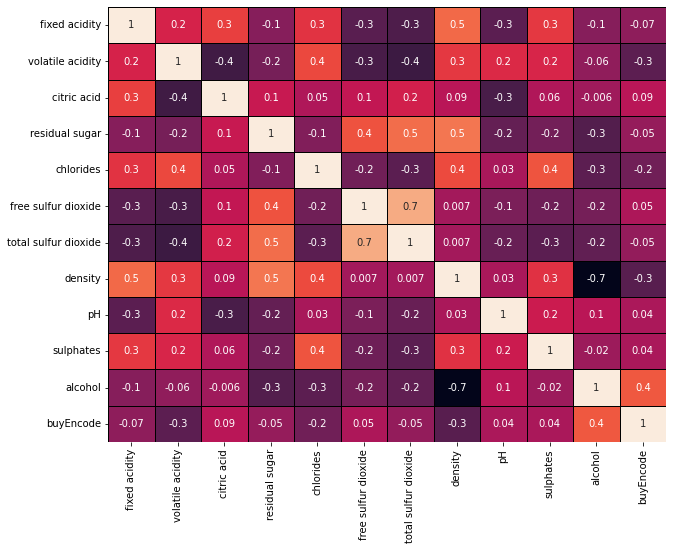

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cbar=False, linewidths=0.9, linecolor='black');

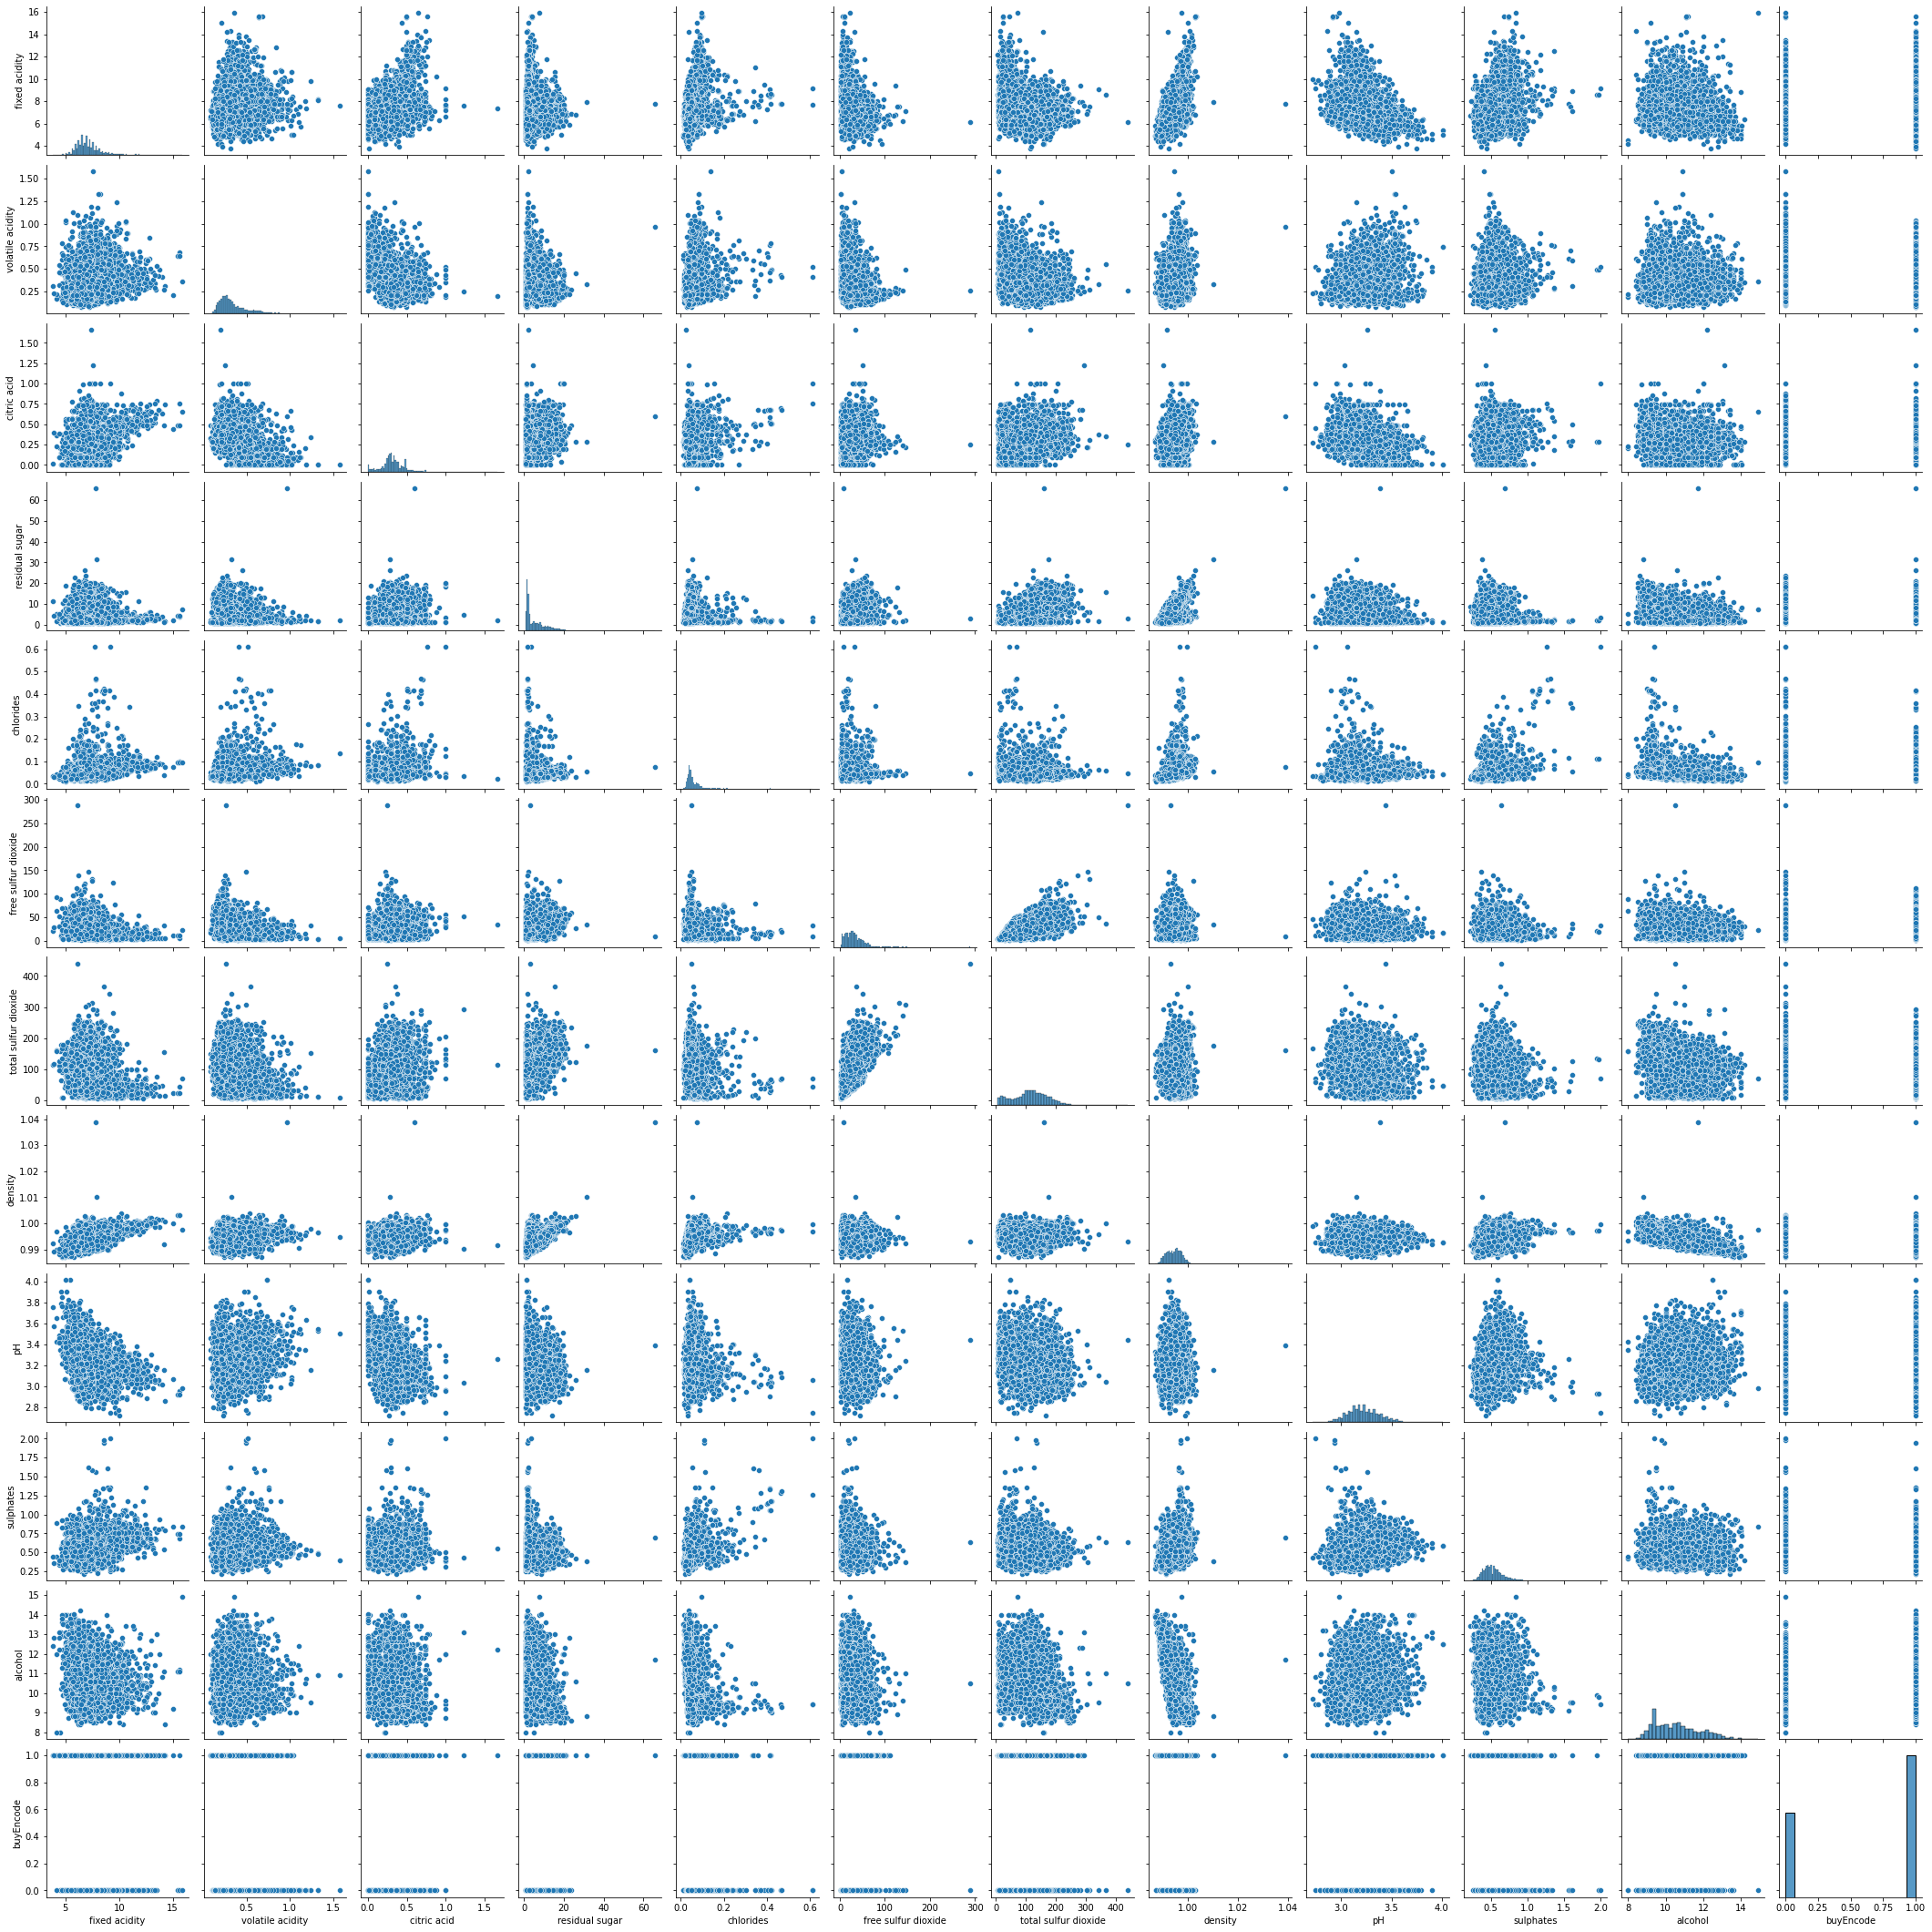

In [22]:
sns.pairplot(df)

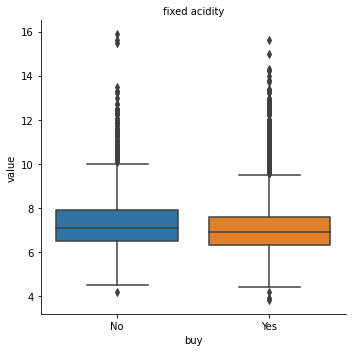

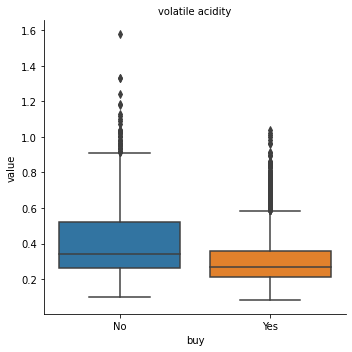

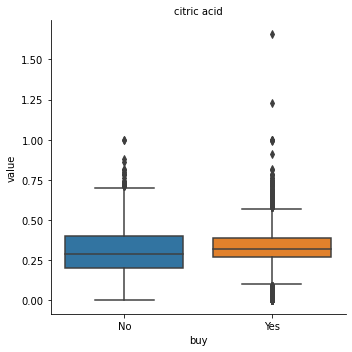

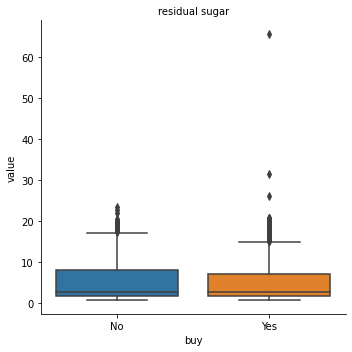

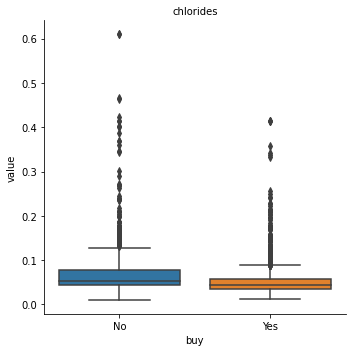

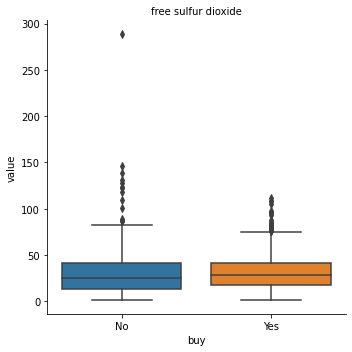

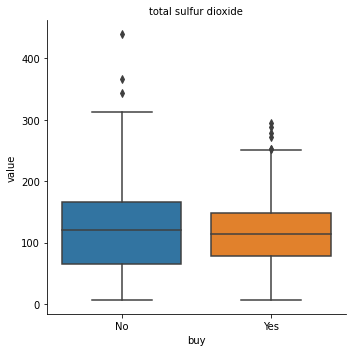

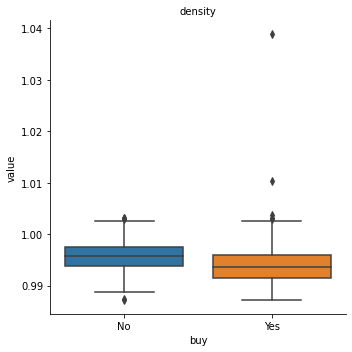

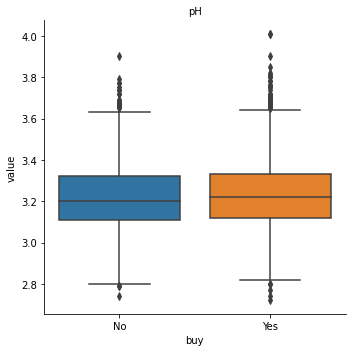

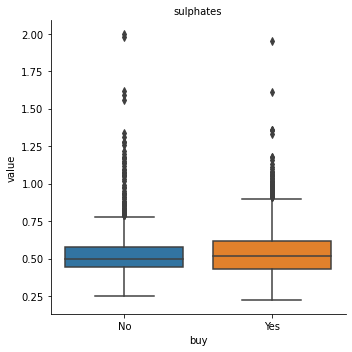

In [23]:
df_melt = df.melt(id_vars = 'buy',
                  value_vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                               'pH', 'sulphates', 'alcohol'],
                  var_name = 'columns')

for i in range(0,len(df.columns)-3):
    a = sns.factorplot(data = df_melt,
                       x = 'buy',
                       y = 'value',
                       kind = 'box', # type of plot
                       col = 'columns',
                       col_order = [df.columns[i]]).set_titles('{col_name}')

plt.show()

<AxesSubplot:xlabel='buy', ylabel='count'>

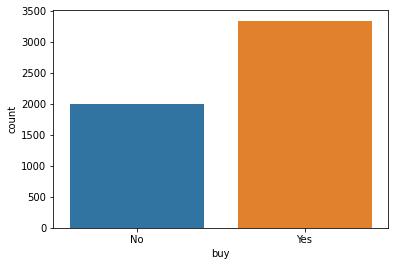

In [24]:
sns.countplot(x = df["buy"])

In [25]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,buy,buyEncode
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,No,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,No,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,No,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Yes,1
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5328,6.4,0.530,0.09,3.9,0.123,14.0,31.0,0.99680,3.50,0.51,11.0,No,0
5329,7.0,0.440,0.09,2.2,0.063,9.0,18.0,0.99444,3.21,0.69,11.3,Yes,1
5330,7.0,0.705,0.10,2.8,0.081,13.0,28.0,0.99631,3.21,0.66,10.2,No,0
5331,7.2,0.300,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,Yes,1


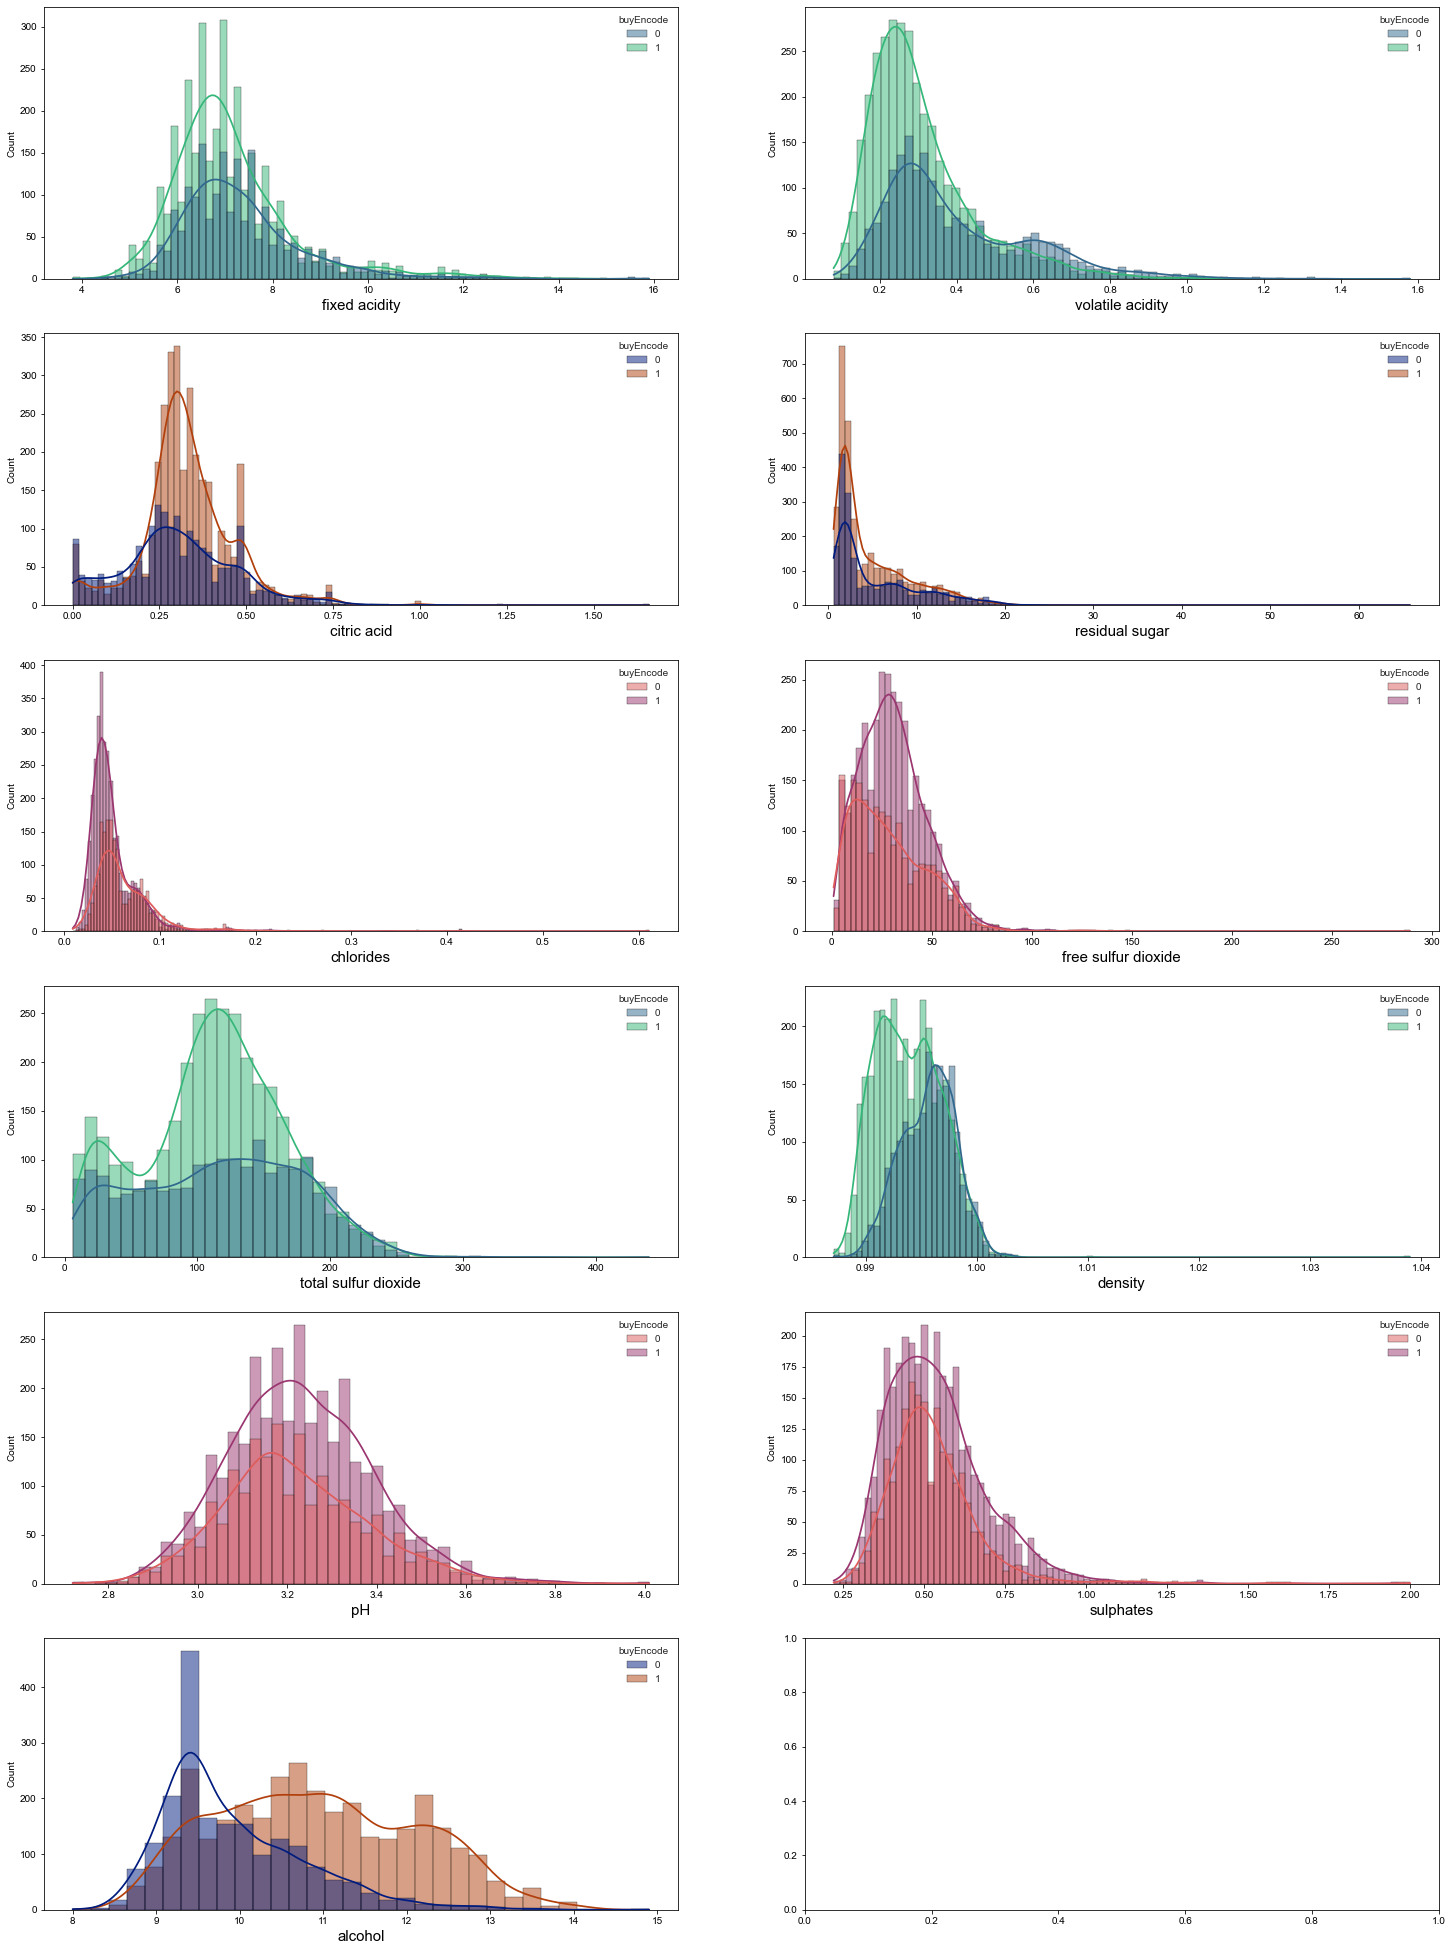

In [26]:
fig, ax = plt.subplots(6,2, figsize = (25,35)) 
plt.style.use("seaborn")

sns.histplot(x = df["fixed acidity"], hue = df["buyEncode"], palette="viridis", kde=True, ax=ax[0,0]);
ax[0,0].set_xlabel("fixed acidity",fontsize=15)

sns.histplot(x = df["volatile acidity"], hue = df["buyEncode"], palette="viridis", kde=True, ax=ax[0,1]);
ax[0,1].set_xlabel("volatile acidity",fontsize=15)

sns.histplot(x = df["citric acid"], hue = df["buyEncode"], palette="dark", kde=True, ax=ax[1,0]);
ax[1,0].set_xlabel("citric acid",fontsize=15)

sns.histplot(x = df["residual sugar"], hue = df["buyEncode"], palette="dark", kde=True, ax=ax[1,1]);
ax[1,1].set_xlabel("residual sugar",fontsize=15)

sns.histplot(x = df["chlorides"], hue = df["buyEncode"], palette="flare", kde=True, ax=ax[2,0]);
ax[2,0].set_xlabel("chlorides",fontsize=15)

sns.histplot(x = df["free sulfur dioxide"], hue = df["buyEncode"], palette="flare", kde=True, ax=ax[2,1]);
ax[2,1].set_xlabel("free sulfur dioxide",fontsize=15)

sns.histplot(x = df["total sulfur dioxide"], hue = df["buyEncode"], palette="viridis", kde=True, ax=ax[3,0]);
ax[3,0].set_xlabel("total sulfur dioxide",fontsize=15)

sns.histplot(x = df["density"], hue = df["buyEncode"], palette="viridis", kde=True, ax=ax[3,1]);
ax[3,1].set_xlabel("density",fontsize=15);

sns.histplot(x = df["pH"], hue = df["buyEncode"], palette="flare", kde=True, ax=ax[4,0]);
ax[4,0].set_xlabel("pH",fontsize=15)

sns.histplot(x = df["sulphates"], hue = df["buyEncode"], palette="flare", kde=True, ax=ax[4,1]);
ax[4,1].set_xlabel("sulphates",fontsize=15);

sns.histplot(x = df["alcohol"], hue = df["buyEncode"], palette="dark", kde=True, ax=ax[5,0]);
ax[5,0].set_xlabel("alcohol",fontsize=15);

# TRAIN/TEST SPLIT

In [27]:
df = df.drop(['buy'], axis=1)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop('buyEncode',axis=1)
y = df['buyEncode']

In [30]:
trainingFeatures, testFeatures, trainingTarget, testTarget \
= train_test_split(X, y, test_size=0.20, random_state=30)

In [31]:
print("Size of training features:", trainingFeatures.shape)
print("Size of training target:", trainingTarget.shape)
print("Size of test features:", testFeatures.shape)
print("Size of test target:", testTarget.shape)

Size of training features: (4266, 11)
Size of training target: (4266,)
Size of test features: (1067, 11)
Size of test target: (1067,)


In [32]:
train_unique_label, train_counts_label = np.unique(trainingTarget, return_counts=True)
test_unique_label, test_counts_label = np.unique(testTarget, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(trainingTarget))
print(test_counts_label/ len(testTarget))

Label Distributions: 

[0.38021566 0.61978434]
[0.34676664 0.65323336]


# ALGORITHM SELECTION & HYPERPARAMETER TUNING WITH GRIDSEARCH CV

In [33]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [34]:
modelParams = {
    'Decision Tree' : {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'], 
            'max_depth': list(range(2,4,1)), 
            'min_samples_leaf': list(range(5,7,1))
        }
    },
    'SVM' : {
        'model': svm.SVC(),
        'params': {
            'C': [0.5, 0.7, 0.9, 1], 
            'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
        }
    },
    'KNN' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': list(range(2,5,1)), 
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'penalty': ['l1', 'l2'], 
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [200, 500],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6,7,8],
            'criterion' :['gini', 'entropy']
        }
    }
}

In [35]:
scores = []
bestEstimators = {}

for algo, mp in modelParams.items():
    #train data with 5 cross validation
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    #training data which is split into train and valid by GridCV
    clf.fit(trainingFeatures, trainingTarget)
    scores.append({
        'Model': algo,
        'Best Score': clf.best_score_,
        'Best Params': clf.best_params_,
    })
    bestEstimators[algo] = clf.best_estimator_
    
dfModels = pd.DataFrame(scores,columns=['Model','Best Score','Best Params'])

In [36]:
dfModels

,Model,Best Score,Best Params
0,Decision Tree,0.718237,"{'criterion': 'entropy', 'max_depth': 2, 'min_..."
1,SVM,0.746600,"{'C': 0.9, 'kernel': 'linear'}"
2,KNN,0.644159,"{'algorithm': 'auto', 'n_neighbors': 3}"
3,Logistic Regression,0.737460,"{'C': 1000, 'penalty': 'l2'}"
4,Random Forest,0.766761,"{'criterion': 'gini', 'max_depth': 8, 'max_fea..."


# TESTING


Test Data
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       370
           1       0.81      0.85      0.83       697

    accuracy                           0.77      1067
   macro avg       0.75      0.74      0.75      1067
weighted avg       0.77      0.77      0.77      1067

[[233 137]
 [104 593]]

AUC: 0.84

Acutal Values: {0: 370, 1: 697}
Predicted Values: {0: 337, 1: 730}


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

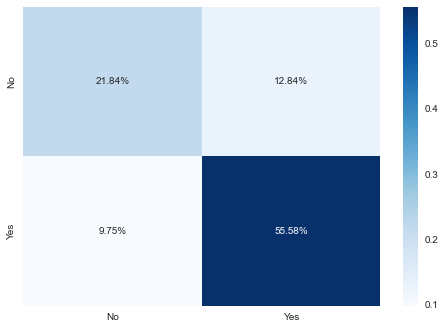

In [37]:
rfBasicTraining = bestEstimators['Random Forest']
rfBasicTraining.fit(trainingFeatures, trainingTarget)

pred = rfBasicTraining.predict(testFeatures)
print("\nTest Data")

print(classification_report(testTarget, pred))
cf_matrix = confusion_matrix(testTarget, pred)
print(cf_matrix)

pred_proba = rfBasicTraining.predict_proba(testFeatures)
rfBasicTrainingAUCScore = roc_auc_score(testTarget, pred_proba[:,1])
print('\nAUC:', round(rfBasicTrainingAUCScore,2))

unique, counts = np.unique(testTarget, return_counts=True)
print('\nAcutal Values:', dict(zip(unique, counts)))
unique, counts = np.unique(pred, return_counts=True)
print('Predicted Values:', dict(zip(unique, counts)))

ax = plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues', ax=ax)
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

In [38]:
rfBasicTrainingTP = cf_matrix[0][0]
rfBasicTrainingFN = cf_matrix[0][1]
rfBasicTrainingFP = cf_matrix[1][0]
rfBasicTrainingTN = cf_matrix[1][1]
report = classification_report(testTarget, pred, output_dict=True)
rfBasicTrainingPrecision =  report['macro avg']['precision'] 
rfBasicTrainingRecall = report['macro avg']['recall']    
rfBasicTrainingF1 = report['macro avg']['f1-score']
rfBasicTrainingAccuracy = report['accuracy']

# OVERSAMPLING (SMOTE) TO BALANCE DATASET

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
xTrain, xVal, yTrain, yVal = train_test_split(trainingFeatures, trainingTarget,
                                                  test_size = .10,
                                                  random_state=12)

In [41]:
oversample = SMOTE()
xTrainSMOTE, yTrainSMOTE = oversample.fit_resample(xTrain, yTrain)

In [42]:
print("Size before SMOTE")
print("Size of training features:", xTrain.shape)
print("Size of training target:", yTrain.shape)

print("\nSize after SMOTE")
print("Size of training features:", xTrainSMOTE.shape)
print("Size of training target:", yTrainSMOTE.shape)

Size before SMOTE
Size of training features: (3839, 11)
Size of training target: (3839,)

Size after SMOTE
Size of training features: (4750, 11)
Size of training target: (4750,)


<AxesSubplot:xlabel='buyEncode', ylabel='count'>

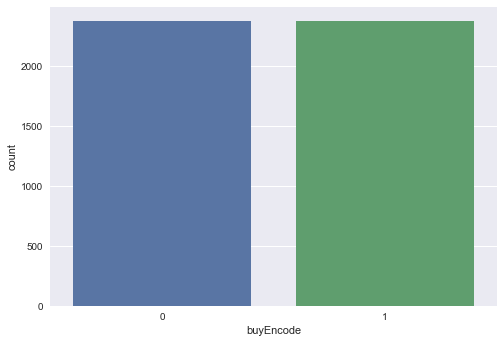

In [43]:
sns.countplot(x = yTrainSMOTE)

# OVERSAMPLING VALIDATION



Validation Data
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       158
           1       0.86      0.78      0.82       269

    accuracy                           0.78       427
   macro avg       0.77      0.78      0.77       427
weighted avg       0.79      0.78      0.79       427

[[125  33]
 [ 60 209]]

AUC: 0.85

Acutal Values: {0: 158, 1: 269}
Predicted Values: {0: 185, 1: 242}


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

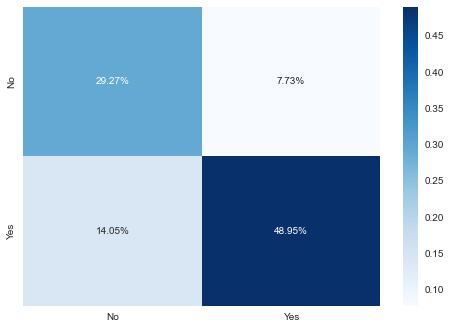

In [44]:
rfOS = bestEstimators['Random Forest']
rfOS.fit(xTrainSMOTE, yTrainSMOTE)

pred = rfOS.predict(xVal)
print("\n\nValidation Data")
print(classification_report(yVal, pred))
cf_matrix = confusion_matrix(yVal, pred)
print(cf_matrix)

pred_proba = rfOS.predict_proba(xVal)
auc_score = roc_auc_score(yVal, pred_proba[:,1])
print('\nAUC:', round(auc_score,2))

unique, counts = np.unique(yVal, return_counts=True)
print('\nAcutal Values:', dict(zip(unique, counts)))
unique, counts = np.unique(pred, return_counts=True)
print('Predicted Values:', dict(zip(unique, counts)))

ax = plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues', ax=ax)
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

# OVERSAMPLING TESTING

Test Data
              precision    recall  f1-score   support

           0       0.63      0.76      0.69       370
           1       0.86      0.77      0.81       697

    accuracy                           0.76      1067
   macro avg       0.75      0.76      0.75      1067
weighted avg       0.78      0.76      0.77      1067

[[280  90]
 [161 536]]

AUC: 0.85

Acutal Values: {0: 370, 1: 697}
Predicted Values: {0: 441, 1: 626}


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

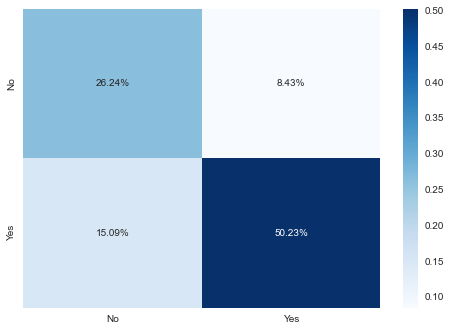

In [45]:
pred = rfOS.predict(testFeatures)

print("Test Data")
print(classification_report(testTarget, pred))
cf_matrix = confusion_matrix(testTarget, pred)
print(cf_matrix)

pred_proba = rfOS.predict_proba(testFeatures)
rfOSAUCScore = roc_auc_score(testTarget, pred_proba[:,1])
print('\nAUC:', round(auc_score,2))

unique, counts = np.unique(testTarget, return_counts=True)
print('\nAcutal Values:', dict(zip(unique, counts)))
unique, counts = np.unique(pred, return_counts=True)
print('Predicted Values:', dict(zip(unique, counts)))

ax = plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues', ax=ax)
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])


In [46]:
rfOSTP = cf_matrix[0][0]
rfOSFN = cf_matrix[0][1]
rfOSFP = cf_matrix[1][0]
rfOSTN = cf_matrix[1][1]
report = classification_report(testTarget, pred, output_dict=True)
rfOSPrecision =  report['macro avg']['precision'] 
rfOSRecall = report['macro avg']['recall']    
rfOSF1 = report['macro avg']['f1-score']
rfOSAccuracy = report['accuracy']

# RANDOM UNDERSAMPLING TO BALANCE DATASET

In [47]:
from imblearn.under_sampling import RandomUnderSampler


In [48]:
xTrain, xVal, yTrain, yVal = train_test_split(trainingFeatures, trainingTarget,
                                                  test_size = .10,
                                                  random_state=12)

In [49]:
rus = RandomUnderSampler(random_state=42)
xTrainRUS, yTrainRUS = rus.fit_resample(xTrain, yTrain)

In [50]:
print("Size before Random Under Sampling")
print("Size of training features:", xTrain.shape)
print("Size of training target:", yTrain.shape)

print("\nSize after Random Under Sampling")
print("Size of training features:", xTrainRUS.shape)
print("Size of training target:", yTrainRUS.shape)

Size before Random Under Sampling
Size of training features: (3839, 11)
Size of training target: (3839,)

Size after Random Under Sampling
Size of training features: (2928, 11)
Size of training target: (2928,)


<AxesSubplot:xlabel='buyEncode', ylabel='count'>

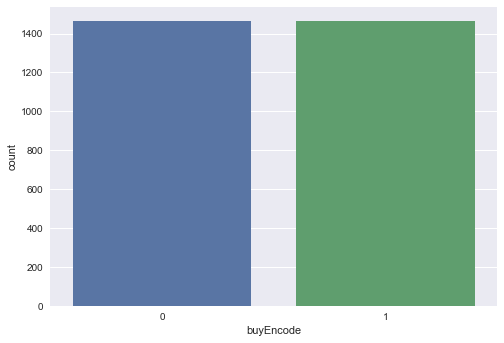

In [51]:
sns.countplot(x = yTrainRUS)

# UNDERSAMPLING VALIDATION



Validation Data
              precision    recall  f1-score   support

           0       0.65      0.81      0.72       158
           1       0.87      0.74      0.80       269

    accuracy                           0.77       427
   macro avg       0.76      0.77      0.76       427
weighted avg       0.79      0.77      0.77       427

[[128  30]
 [ 70 199]]

AUC: 0.85

Acutal Values: {0: 158, 1: 269}
Predicted Values: {0: 198, 1: 229}


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

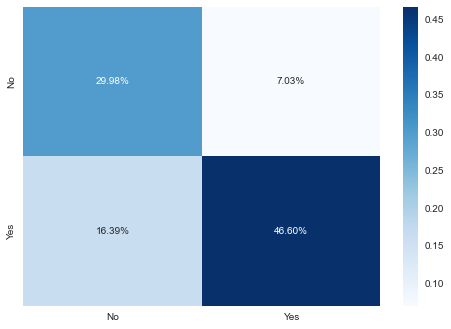

In [52]:
rfUS = bestEstimators['Random Forest']
rfUS.fit(xTrainRUS, yTrainRUS)

pred = rfUS.predict(xVal)
print("\n\nValidation Data")
print(classification_report(yVal, pred))
cf_matrix = confusion_matrix(yVal, pred)
print(cf_matrix)

pred_proba = rfUS.predict_proba(xVal)
auc_score = roc_auc_score(yVal, pred_proba[:,1])
print('\nAUC:', round(auc_score,2))

unique, counts = np.unique(yVal, return_counts=True)
print('\nAcutal Values:', dict(zip(unique, counts)))
unique, counts = np.unique(pred, return_counts=True)
print('Predicted Values:', dict(zip(unique, counts)))

ax = plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues', ax=ax)
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

# UNDERSAMPLING TESTING

Test Data
              precision    recall  f1-score   support

           0       0.62      0.78      0.69       370
           1       0.87      0.75      0.80       697

    accuracy                           0.76      1067
   macro avg       0.74      0.76      0.75      1067
weighted avg       0.78      0.76      0.76      1067

[[290  80]
 [177 520]]

AUC: 0.85

Acutal Values: {0: 370, 1: 697}
Predicted Values: {0: 467, 1: 600}


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

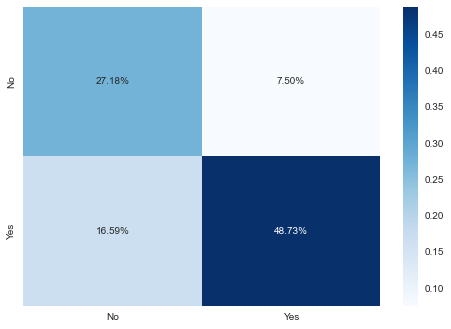

In [53]:
pred = rfUS.predict(testFeatures)

print("Test Data")
print(classification_report(testTarget, pred))
cf_matrix = confusion_matrix(testTarget, pred)
print(cf_matrix)

pred_proba = rfUS.predict_proba(testFeatures)
rfUSAUCScore = roc_auc_score(testTarget, pred_proba[:,1])
print('\nAUC:', round(auc_score,2))

unique, counts = np.unique(testTarget, return_counts=True)
print('\nAcutal Values:', dict(zip(unique, counts)))
unique, counts = np.unique(pred, return_counts=True)
print('Predicted Values:', dict(zip(unique, counts)))

ax = plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues', ax=ax)
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

In [54]:
rfUSTP = cf_matrix[0][0]
rfUSFN = cf_matrix[0][1]
rfUSFP = cf_matrix[1][0]
rfUSTN = cf_matrix[1][1]
report = classification_report(testTarget, pred, output_dict=True)
rfUSPrecision =  report['macro avg']['precision'] 
rfUSRecall = report['macro avg']['recall']    
rfUSF1 = report['macro avg']['f1-score']
rfUSAccuracy = report['accuracy']

# ----------------------------------------------------------------------------------

# TESTING MODEL

In [55]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'buyEncode'],
      dtype='object')

In [56]:
def predict(fixedAcidity, volatileAcidity, citricAcid, residualSugar, chlorides,
                  freeSulfurDioxide, totalSulfurDioxide, density, pH, sulphates, alcohol):    

    x = np.zeros(len(X.columns))
    x[0] = fixedAcidity
    x[1] = volatileAcidity
    x[2] = citricAcid
    x[3] = residualSugar
    x[4] = chlorides
    x[5] = freeSulfurDioxide
    x[6] = totalSulfurDioxide
    x[7] = density
    x[8] = pH
    x[9] = sulphates
    x[10] = alcohol
    
    prediction = rfBasicTraining.predict([x])[0]
    if prediction == 0:
        print("No")
    else:
        print("Yes")
    
    return 

In [57]:
df.iloc[1]

fixed acidity            7.8000
volatile acidity         0.8800
citric acid              0.0000
residual sugar           2.6000
chlorides                0.0980
free sulfur dioxide     25.0000
total sulfur dioxide    67.0000
density                  0.9968
pH                       3.2000
sulphates                0.6800
alcohol                  9.8000
buyEncode                0.0000
Name: 1, dtype: float64

In [58]:
df.iloc[103]

fixed acidity           10.1000
volatile acidity         0.3100
citric acid              0.4400
residual sugar           2.3000
chlorides                0.0800
free sulfur dioxide     22.0000
total sulfur dioxide    46.0000
density                  0.9988
pH                       3.3200
sulphates                0.6700
alcohol                  9.7000
buyEncode                1.0000
Name: 103, dtype: float64

In [59]:
predict(7.8, 0.88, 0, 2.6, 0.09, 25, 67, 0.99, 3.2, 0.68, 5)
predict(10.10, 0.31, 0.44, 2.3, 0.08, 22, 46, 0.9988, 3.32, 0.67, 9.7)

No
Yes


# EXPORT PICKLE FILE

In [60]:
import pickle
with open('files/wineQualityModel.pkl','wb') as f:
    pickle.dump(rfBasicTraining,f)

# MODEL WITH FEATURE SELECTION

# Stepwise Regression

In [61]:
xColumns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
yColumn = df['buyEncode']

In [62]:
import numpy as np
import statsmodels.api as sm

def getStats():
    x = df[xColumns]
    results = sm.OLS(yColumn, x).fit()
    print(results.summary())
    
getStats()

                                 OLS Regression Results                                
Dep. Variable:              buyEncode   R-squared (uncentered):                   0.723
Model:                            OLS   Adj. R-squared (uncentered):              0.722
Method:                 Least Squares   F-statistic:                              1262.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):                        0.00
Time:                        12:19:16   Log-Likelihood:                         -2898.4
No. Observations:                5333   AIC:                                      5819.
Df Residuals:                    5322   BIC:                                      5891.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [63]:
xColumns.remove("citric acid")
getStats()

                                 OLS Regression Results                                
Dep. Variable:              buyEncode   R-squared (uncentered):                   0.723
Model:                            OLS   Adj. R-squared (uncentered):              0.722
Method:                 Least Squares   F-statistic:                              1388.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):                        0.00
Time:                        12:19:16   Log-Likelihood:                         -2898.5
No. Observations:                5333   AIC:                                      5817.
Df Residuals:                    5323   BIC:                                      5883.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [64]:
xColumns.remove("fixed acidity")
getStats()

                                 OLS Regression Results                                
Dep. Variable:              buyEncode   R-squared (uncentered):                   0.723
Model:                            OLS   Adj. R-squared (uncentered):              0.722
Method:                 Least Squares   F-statistic:                              1542.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):                        0.00
Time:                        12:19:16   Log-Likelihood:                         -2899.3
No. Observations:                5333   AIC:                                      5817.
Df Residuals:                    5324   BIC:                                      5876.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [65]:
xColumns.remove("chlorides")
getStats()

                                 OLS Regression Results                                
Dep. Variable:              buyEncode   R-squared (uncentered):                   0.722
Model:                            OLS   Adj. R-squared (uncentered):              0.722
Method:                 Least Squares   F-statistic:                              1733.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):                        0.00
Time:                        12:19:16   Log-Likelihood:                         -2902.1
No. Observations:                5333   AIC:                                      5820.
Df Residuals:                    5325   BIC:                                      5873.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

# TRAIN/TEST SPLIT

In [66]:
X_SWR = df.drop(['buyEncode','citric acid','fixed acidity','chlorides'],axis=1)
y_SWR = df['buyEncode']

In [67]:
trainingFeatures, testFeatures, trainingTarget, testTarget \
= train_test_split(X_SWR, y_SWR, test_size=0.20, random_state=30)

# TESTING


Test Data
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       370
           1       0.82      0.85      0.83       697

    accuracy                           0.78      1067
   macro avg       0.75      0.74      0.75      1067
weighted avg       0.77      0.78      0.77      1067

[[238 132]
 [108 589]]

AUC: 0.85

Acutal Values: {0: 370, 1: 697}
Predicted Values: {0: 346, 1: 721}


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

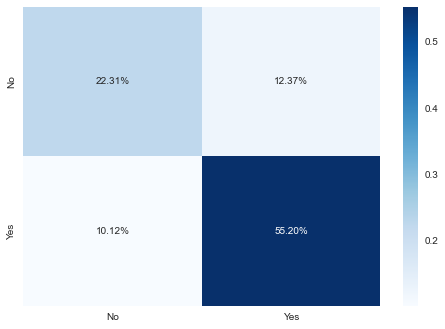

In [68]:
rfSWRBasicTraining = bestEstimators['Random Forest']
rfSWRBasicTraining.fit(trainingFeatures, trainingTarget)

pred = rfSWRBasicTraining.predict(testFeatures)
print("\nTest Data")
print(classification_report(testTarget, pred))
cf_matrix = confusion_matrix(testTarget, pred)
print(cf_matrix)

pred_proba = rfSWRBasicTraining.predict_proba(testFeatures)
rfSWRBasicTrainingAUCScore = roc_auc_score(testTarget, pred_proba[:,1])
print('\nAUC:', round(auc_score,2))

unique, counts = np.unique(testTarget, return_counts=True)
print('\nAcutal Values:', dict(zip(unique, counts)))
unique, counts = np.unique(pred, return_counts=True)
print('Predicted Values:', dict(zip(unique, counts)))

ax = plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues', ax=ax)
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

In [69]:
rfSWRBasicTrainingTP = cf_matrix[0][0]
rfSWRBasicTrainingFN = cf_matrix[0][1]
rfSWRBasicTrainingFP = cf_matrix[1][0]
rfSWRBasicTrainingTN = cf_matrix[1][1]
report = classification_report(testTarget, pred, output_dict=True)
rfSWRBasicTrainingPrecision =  report['macro avg']['precision'] 
rfSWRBasicTrainingRecall = report['macro avg']['recall']    
rfSWRBasicTrainingF1 = report['macro avg']['f1-score']
rfSWRBasicTrainingAccuracy = report['accuracy']

# OVERSAMPLING (SMOTE) TO BALANCE DATASET

In [70]:
xTrain, xVal, yTrain, yVal = train_test_split(trainingFeatures, trainingTarget,
                                                  test_size = .10,
                                                  random_state=12)

Size before SMOTE
Size of training features: (3839, 8)
Size of training target: (3839,)

Size after SMOTE
Size of training features: (4750, 8)
Size of training target: (4750,)


<AxesSubplot:xlabel='buyEncode', ylabel='count'>

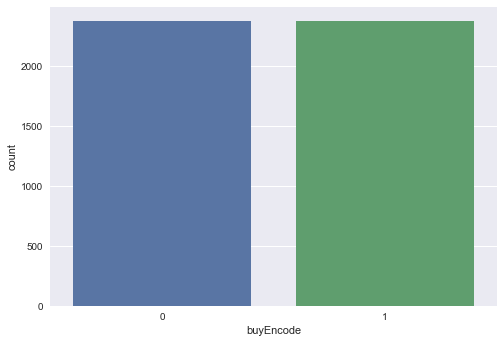

In [71]:
oversample = SMOTE()
xTrainSMOTE, yTrainSMOTE = oversample.fit_resample(xTrain, yTrain)

print("Size before SMOTE")
print("Size of training features:", xTrain.shape)
print("Size of training target:", yTrain.shape)

print("\nSize after SMOTE")
print("Size of training features:", xTrainSMOTE.shape)
print("Size of training target:", yTrainSMOTE.shape)

sns.countplot(x = yTrainSMOTE)

# OVERSAMPLING VALIDATION



Validation Data
              precision    recall  f1-score   support

           0       0.64      0.81      0.72       158
           1       0.87      0.73      0.79       269

    accuracy                           0.76       427
   macro avg       0.75      0.77      0.75       427
weighted avg       0.78      0.76      0.77       427

[[128  30]
 [ 72 197]]

AUC: 0.84

Acutal Values: {0: 158, 1: 269}
Predicted Values: {0: 200, 1: 227}


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

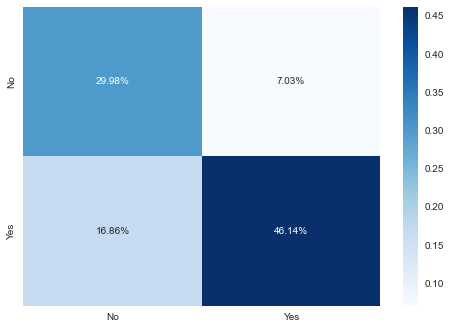

In [72]:
rfSWROS = bestEstimators['Random Forest']
rfSWROS.fit(xTrainSMOTE, yTrainSMOTE)

pred = rfSWROS.predict(xVal)
print("\n\nValidation Data")
print(classification_report(yVal, pred))
cf_matrix = confusion_matrix(yVal, pred)
print(cf_matrix)

pred_proba = rfSWROS.predict_proba(xVal)
auc_score = roc_auc_score(yVal, pred_proba[:,1])
print('\nAUC:', round(auc_score,2))

unique, counts = np.unique(yVal, return_counts=True)
print('\nAcutal Values:', dict(zip(unique, counts)))
unique, counts = np.unique(pred, return_counts=True)
print('Predicted Values:', dict(zip(unique, counts)))

ax = plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues', ax=ax)
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

# OVERSAMPLING TESTING

Test Data
              precision    recall  f1-score   support

           0       0.63      0.74      0.68       370
           1       0.85      0.77      0.81       697

    accuracy                           0.76      1067
   macro avg       0.74      0.76      0.74      1067
weighted avg       0.77      0.76      0.76      1067

[[274  96]
 [160 537]]

AUC: 0.84

Acutal Values: {0: 370, 1: 697}
Predicted Values: {0: 434, 1: 633}


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

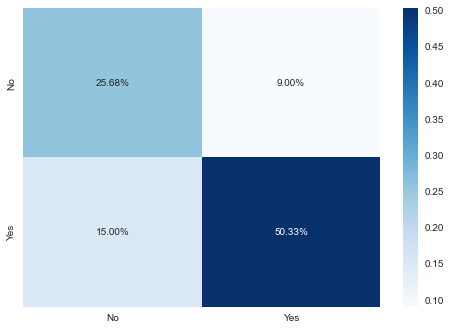

In [73]:
pred = rfSWROS.predict(testFeatures)

print("Test Data")
print(classification_report(testTarget, pred))
cf_matrix = confusion_matrix(testTarget, pred)
print(cf_matrix)

pred_proba = rfSWROS.predict_proba(testFeatures)
rfSWROSAUCScore = roc_auc_score(testTarget, pred_proba[:,1])
print('\nAUC:', round(auc_score,2))

unique, counts = np.unique(testTarget, return_counts=True)
print('\nAcutal Values:', dict(zip(unique, counts)))
unique, counts = np.unique(pred, return_counts=True)
print('Predicted Values:', dict(zip(unique, counts)))

ax = plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues', ax=ax)
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

In [74]:
rfSWROSTP = cf_matrix[0][0]
rfSWROSFN = cf_matrix[0][1]
rfSWROSFP = cf_matrix[1][0]
rfSWROSTN = cf_matrix[1][1]
report = classification_report(testTarget, pred, output_dict=True)
rfSWROSPrecision =  report['macro avg']['precision'] 
rfSWROSRecall = report['macro avg']['recall']    
rfSWROSF1 = report['macro avg']['f1-score']
rfSWROSAccuracy = report['accuracy']

# UNDERSAMPLING TO BALANCE DATASET

In [75]:
xTrain, xVal, yTrain, yVal = train_test_split(trainingFeatures, trainingTarget,
                                                  test_size = .10,
                                                  random_state=12)

In [76]:
rus = RandomUnderSampler(random_state=42)
xTrainRUS, yTrainRUS = rus.fit_resample(xTrain, yTrain)

In [77]:
print("Size before Random Under Sampling")
print("Size of training features:", xTrain.shape)
print("Size of training target:", yTrain.shape)

print("\nSize after Random Under Sampling")
print("Size of training features:", xTrainRUS.shape)
print("Size of training target:", yTrainRUS.shape)

Size before Random Under Sampling
Size of training features: (3839, 8)
Size of training target: (3839,)

Size after Random Under Sampling
Size of training features: (2928, 8)
Size of training target: (2928,)


<AxesSubplot:xlabel='buyEncode', ylabel='count'>

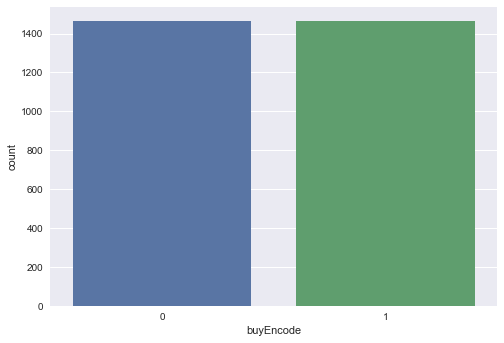

In [78]:
sns.countplot(x = yTrainRUS)

# UNDERSAMPLING VALIDATION



Validation Data
              precision    recall  f1-score   support

           0       0.62      0.82      0.71       158
           1       0.87      0.71      0.78       269

    accuracy                           0.75       427
   macro avg       0.75      0.76      0.74       427
weighted avg       0.78      0.75      0.75       427

[[130  28]
 [ 79 190]]

AUC: 0.85

Acutal Values: {0: 158, 1: 269}
Predicted Values: {0: 209, 1: 218}


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

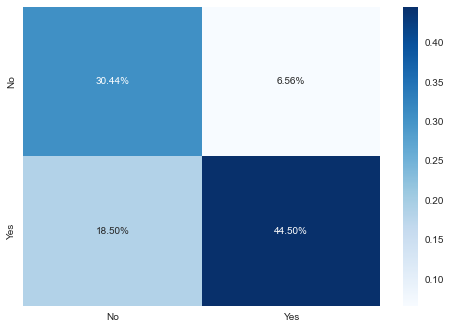

In [79]:
rfSWRUS = bestEstimators['Random Forest']
rfSWRUS.fit(xTrainRUS, yTrainRUS)

pred = rfSWRUS.predict(xVal)
print("\n\nValidation Data")
print(classification_report(yVal, pred))
cf_matrix = confusion_matrix(yVal, pred)
print(cf_matrix)

pred_proba = rfSWRUS.predict_proba(xVal)
auc_score = roc_auc_score(yVal, pred_proba[:,1])
print('\nAUC:', round(auc_score,2))

unique, counts = np.unique(yVal, return_counts=True)
print('\nAcutal Values:', dict(zip(unique, counts)))
unique, counts = np.unique(pred, return_counts=True)
print('Predicted Values:', dict(zip(unique, counts)))

ax = plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues', ax=ax)
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

# UNDERSAMPLING TESTING

Test Data
              precision    recall  f1-score   support

           0       0.61      0.77      0.68       370
           1       0.86      0.73      0.79       697

    accuracy                           0.75      1067
   macro avg       0.73      0.75      0.74      1067
weighted avg       0.77      0.75      0.75      1067

[[286  84]
 [186 511]]

AUC: 0.85

Acutal Values: {0: 370, 1: 697}
Predicted Values: {0: 472, 1: 595}


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

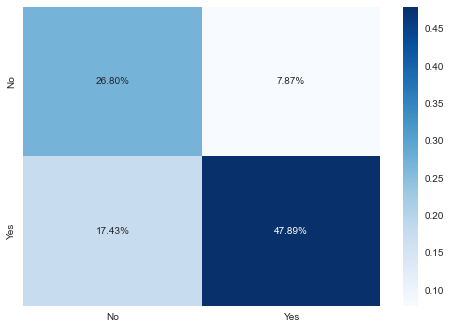

In [80]:
pred = rfSWRUS.predict(testFeatures)

print("Test Data")
print(classification_report(testTarget, pred))
cf_matrix = confusion_matrix(testTarget, pred)
print(cf_matrix)

pred_proba = rfSWRUS.predict_proba(testFeatures)
rfSWRUSAUCScore = roc_auc_score(testTarget, pred_proba[:,1])
print('\nAUC:', round(auc_score,2))

unique, counts = np.unique(testTarget, return_counts=True)
print('\nAcutal Values:', dict(zip(unique, counts)))
unique, counts = np.unique(pred, return_counts=True)
print('Predicted Values:', dict(zip(unique, counts)))

ax = plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues', ax=ax)
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

In [81]:
rfSWRUSTP = cf_matrix[0][0]
rfSWRUSFN = cf_matrix[0][1]
rfSWRUSFP = cf_matrix[1][0]
rfSWRUSTN = cf_matrix[1][1]
report = classification_report(testTarget, pred, output_dict=True)
rfSWRUSPrecision =  report['macro avg']['precision'] 
rfSWRUSRecall = report['macro avg']['recall']    
rfSWRUSF1 = report['macro avg']['f1-score']
rfSWRUSAccuracy = report['accuracy']

# TESTING MODEL

In [82]:
xColumns

['volatile acidity',
 'residual sugar',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [83]:
def predict(volatileAcidity, residualSugar,
                  freeSulfurDioxide, totalSulfurDioxide, density, pH, sulphates, alcohol):    

    x = np.zeros(len(xColumns))
    x[0] = volatileAcidity
    x[1] = residualSugar
    x[2] = freeSulfurDioxide
    x[3] = totalSulfurDioxide
    x[4] = density
    x[5] = pH
    x[6] = sulphates
    x[7] = alcohol
    
    prediction = rfSWRBasicTraining.predict([x])[0]
    if prediction == 0:
        print("No")
    else:
        print("Yes")
    
    return 

In [84]:
df.iloc[1]

fixed acidity            7.8000
volatile acidity         0.8800
citric acid              0.0000
residual sugar           2.6000
chlorides                0.0980
free sulfur dioxide     25.0000
total sulfur dioxide    67.0000
density                  0.9968
pH                       3.2000
sulphates                0.6800
alcohol                  9.8000
buyEncode                0.0000
Name: 1, dtype: float64

In [85]:
df.iloc[103]

fixed acidity           10.1000
volatile acidity         0.3100
citric acid              0.4400
residual sugar           2.3000
chlorides                0.0800
free sulfur dioxide     22.0000
total sulfur dioxide    46.0000
density                  0.9988
pH                       3.3200
sulphates                0.6700
alcohol                  9.7000
buyEncode                1.0000
Name: 103, dtype: float64

In [86]:
predict(0.88, 2.6, 25, 67, 0.99, 3.2, 0.68, 5)
predict(0.31, 2.3, 22, 46, 0.9988, 3.32, 0.67, 9.7)

No
Yes


# SAVING MIN MAX VALUES FOR UI

In [87]:
dataMinMax = {'Min': [], 'Max': []}
dfMinMax = pd.DataFrame(dataMinMax)

In [88]:
dfMinMax['Min'] = df.min()
dfMinMax['Max'] = df.max()
dfMinMax

,Min,Max
fixed acidity,3.80000,15.90000
volatile acidity,0.08000,1.58000
citric acid,0.00000,1.66000
residual sugar,0.60000,65.80000
chlorides,0.00900,0.61100
free sulfur dioxide,1.00000,289.00000
total sulfur dioxide,6.00000,440.00000
density,0.98711,1.03898
pH,2.72000,4.01000
sulphates,0.22000,2.00000


In [89]:
dfMinMax.to_csv('files/dataframeMixMaxValues.csv')

In [90]:
minMax = pd.read_csv('files/dataframeMixMaxValues.csv')
minMax

,Unnamed: 0,Min,Max
0,fixed acidity,3.80000,15.90000
1,volatile acidity,0.08000,1.58000
2,citric acid,0.00000,1.66000
3,residual sugar,0.60000,65.80000
4,chlorides,0.00900,0.61100
5,free sulfur dioxide,1.00000,289.00000
6,total sulfur dioxide,6.00000,440.00000
7,density,0.98711,1.03898
8,pH,2.72000,4.01000
9,sulphates,0.22000,2.00000


In [91]:
minMax.iloc[0][1]

3.8

In [92]:
minMax.iloc[0][2]

15.9

# RESULTS DATASET

In [93]:
testDataResults = {'Basic Testing': [], 'Basic Testing - SMOTE': [], 'Basic Testing - RUS': [], 
                   'SWR Testing': [], 'SWR Testing - SMOTE': [], 'SWR Testing - RUS': []}
testDataResults = pd.DataFrame(testDataResults)

In [94]:
testDataResults.loc['TP'] = [rfBasicTrainingTP, rfOSTP, rfUSTP, rfSWRBasicTrainingTP, rfSWROSTP, rfSWRUSTP]
testDataResults.loc['FN'] = [rfBasicTrainingFN, rfOSFN, rfUSFN, rfSWRBasicTrainingFN, rfSWROSFN, rfSWRUSFN]
testDataResults.loc['FP'] = [rfBasicTrainingFP, rfOSFP, rfUSFP, rfSWRBasicTrainingFP, rfSWROSFP, rfSWRUSFP]
testDataResults.loc['TN'] = [rfBasicTrainingTN, rfOSTN, rfUSTN, rfSWRBasicTrainingTN, rfSWROSTN, rfSWRUSTN]
testDataResults.loc['Precision'] = [rfBasicTrainingPrecision, rfOSPrecision, rfUSPrecision, rfSWRBasicTrainingPrecision, rfSWROSPrecision, rfSWRUSPrecision]
testDataResults.loc['Recall'] = [rfBasicTrainingRecall, rfOSRecall, rfUSRecall, rfSWRBasicTrainingRecall, rfSWROSRecall, rfSWRUSRecall]
testDataResults.loc['F1'] = [rfBasicTrainingF1, rfOSF1, rfUSF1, rfSWRBasicTrainingF1, rfSWROSF1, rfSWRUSF1]
testDataResults.loc['Accuracy'] = [rfBasicTrainingAccuracy, rfOSAccuracy, rfUSAccuracy, rfSWRBasicTrainingAccuracy, rfSWROSAccuracy, rfSWRUSAccuracy]
testDataResults.loc['AUC'] = [rfBasicTrainingAUCScore, rfOSAUCScore, rfUSAUCScore, rfSWRBasicTrainingAUCScore, rfSWROSAUCScore, rfSWRUSAUCScore]

testDataResults

,Basic Testing,Basic Testing - SMOTE,Basic Testing - RUS,SWR Testing,SWR Testing - SMOTE,SWR Testing - RUS
TP,233.000000,280.000000,290.000000,238.000000,274.000000,286.000000
FN,137.000000,90.000000,80.000000,132.000000,96.000000,84.000000
FP,104.000000,161.000000,177.000000,108.000000,160.000000,186.000000
TN,593.000000,536.000000,520.000000,589.000000,537.000000,511.000000
Precision,0.751862,0.745575,0.743826,0.752391,0.739839,0.732378
Recall,0.740259,0.762883,0.764919,0.744147,0.755493,0.753058
F1,0.745119,0.750393,0.747401,0.747776,0.744555,0.735178
Accuracy,0.774133,0.764761,0.759138,0.775070,0.760075,0.746954
AUC,0.835748,0.833553,0.832797,0.830494,0.827260,0.829908


In [96]:
testDataResults['Basic Testing'] - testDataResults['SWR Testing']

TP          -5.000000
FN           5.000000
FP          -4.000000
TN           4.000000
Precision   -0.000529
Recall      -0.003887
F1          -0.002657
Accuracy    -0.000937
AUC          0.005254
dtype: float64

# Reflection
PennStates 3 level classify (high, medium, low)
- Random Forest has an accuracy of <b> 67.7% </b>. [Learn More](https://online.stat.psu.edu/stat508/lesson/wqd/wqd.6)
- Classification has an accuracy of <b> 55% </b>. [Learn More](https://online.stat.psu.edu/stat508/lesson/wqd/wqd.5)